# Load dataset

In [ ]:
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz

--2021-02-27 19:30:08--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25342182 (24M) [application/x-gzip]
Saving to: ‘kinetics700_2020.tar.gz’

kinetics700_2020.ta 100%[===================>]  24.17M  49.1MB/s    in 0.5s    

2021-02-27 19:30:09 (49.1 MB/s) - ‘kinetics700_2020.tar.gz’ saved [25342182/25342182]



In [ ]:
import tarfile

tar = tarfile.open('kinetics700_2020.tar.gz', "r:gz")
tar.extractall()
tar.close()

[ERROR: IOPub data rate exceeded](https://stackoverflow.com/questions/50689784/in-google-collab-i-get-iopub-data-rate-exceeded)

[CSV](https://www.programiz.com/python-programming/reading-csv-files)

In [ ]:
import os
import csv
import numpy as np

file_path = '/content/kinetics700_2020'

data_train = []
label_train = []
data_test = []
label_test = []

fname = 'train.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0: # Ignore the header
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_train.append(dict_temp)
      label_train.append(row[0])
    
# Print the first 10 elements
print(data_train[:10])
print(label_train[:10])


# Use validation dataset as test set
fname = 'validate.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0:
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_test.append(dict_temp)
      label_test.append(row[0])

label_train = np.array(label_train)
label_test = np.array(label_test)

[{'url': '---0dWlqevI', 'time': [19.0, 29.0]}, {'url': '---aQ-tA5_A', 'time': [9.0, 19.0]}, {'url': '---j12rm3WI', 'time': [14.0, 24.0]}, {'url': '--07WQ2iBlw', 'time': [1.0, 11.0]}, {'url': '--0NTAs-fA0', 'time': [29.0, 39.0]}, {'url': '--0l35AkU34', 'time': [68.0, 78.0]}, {'url': '--33Lscn6sk', 'time': [4.0, 14.0]}, {'url': '--3OAstUWtU', 'time': [45.0, 55.0]}, {'url': '--3lTx87ebQ', 'time': [23.0, 33.0]}, {'url': '--3ouPhoy2A', 'time': [20.0, 30.0]}]
['clay pottery making', 'news anchoring', 'using bagging machine', 'javelin throw', 'climbing a rope', 'sipping cup', 'flipping pancake', 'tickling', 'watering plants', 'eating spaghetti']


# Action: sneezing


In [ ]:
'''
  We are NOT modifying the stored original train data and train label,

  data_train, label_train,

  only working with indices and save the result to new arrays or lists
'''

target_label = 'sneezing'

# Get indices of 'sneezing' in training set
indices = np.where(label_train == target_label)[0]


train_raw = [] # Store raw info of train data: url & time
y_train = [] # Store train data labels

for idx in indices:
  train_raw.append(data_train[idx]) # Target class raw info
  y_train.append(1) # Target class label = 1

np.random.seed(0)
# Randomly shuffle the indices of all training data
shuffled_indices_total = np.random.permutation(len(data_train))
# Delete the indices of 'sneezing' in training set
shuffled_indices_0 = shuffled_indices_total[~np.isin(
    shuffled_indices_total,indices
)]


# Append the rest of the training samples to train_raw,
# equal number of label 0 as label 1 (target)
# Indices already shuffled, so this is in random order
for i in range(len(indices)):
  train_raw.append(data_train[shuffled_indices_0[i]])
  y_train.append(0)

'''
  Do the same thing for test set
'''
indices_test = np.where(label_test == target_label)[0]

test_raw = []
y_test = []

# Target class in validation set
for idx in indices_test:
  test_raw.append(data_test[idx])
  y_test.append(1)

np.random.seed(0)
shuffled_indices_test = np.random.permutation(len(data_test))
shuffled_indices_test_0 = shuffled_indices_test[~np.isin(
    shuffled_indices_test,indices_test
)]


for i in range(len(indices_test)):
  test_raw.append(data_test[shuffled_indices_test_0[i]])
  y_test.append(0)

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.3MB/s 


Make directory for the Kinetics dataset

In [ ]:
import os

# Directory for the Kinetics dataset
kinetics_dir = '/content/kinetics'
os.mkdir(kinetics_dir)

# Directory for train and test set for Kinetics
train_dir = os.path.join(kinetics_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(kinetics_dir,'test')
os.mkdir(test_dir)

# Directory for target and supplementary classes
train_target_dir = os.path.join(train_dir,'target')
os.mkdir(train_target_dir)
train_others_dir = os.path.join(train_dir,'others')
os.mkdir(train_others_dir)
test_target_dir = os.path.join(test_dir,'target')
os.mkdir(test_target_dir)
test_others_dir = os.path.join(test_dir,'others')
os.mkdir(test_others_dir)

Import specific part of video from YouTube

In [ ]:
import youtube_dl, subprocess
import datetime
import time

'''
  Training and validation set
'''

for i, info in enumerate(train_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_train[i] == 1:
    TARGET = os.path.join(train_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(train_others_dir,"others.{}.mp4".format(
        i - y_train.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  time.sleep(1)
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  


In [ ]:
import youtube_dl, subprocess
import datetime

'''
  Test set
'''
for i, info in enumerate(test_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_test[i] == 1:
    TARGET = os.path.join(test_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(test_others_dir,"others.{}.mp4".format(
        i - y_test.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  

Download videos from Google Colab

In [ ]:
!zip -r /content/file.zip /content/kinetics

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load videos from Drive + preprocess

*   Section all videos frame by frame
*   Preprocess videos

Video frame generator

[Keras video frame generator](https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f)

In [ ]:
!pip install keras-video-generators

In [ ]:
import keras
import keras_video.utils
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/train/{classname}/*.mp4'
# Data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    split_val=0.2,  # 20% of the videos will be used as validation set. 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

val = train.get_validation_generator()

# keras_video.utils.show_sample(train)

class others, validation count: 164, train count: 658
class target, validation count: 179, train count: 718
Total data: 2 classes for 1376 files for train
Total data: 2 classes for 343 files for validation


# Build model and train the network

## Build model

In [ ]:
import keras
from keras import backend
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GlobalMaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.applications import InceptionV3

# The pretrained network we will use
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(112, 112, 3))
conv_base.trainable = False

def action_model(shape=(NFRAME, 112, 112, 3), outputs=2):
    
    # Flatten output of conv_base
    model0 = Sequential()
    model0.add(conv_base)
    model0.add(GlobalMaxPool2D())
    # Build our model for training
    model = Sequential()
    model.add(TimeDistributed(model0, input_shape=shape))
    # LSTM for time series
    model.add(LSTM(64))
    # Build the classifier
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(outputs, activation='sigmoid'))
    return model

INSHAPE=(NFRAME,) + SIZE + (CHANNELS,) # (15, 112, 112, 3)
model = action_model(INSHAPE, len(classes))

model.summary()


87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 2048)          21802784  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                540928    
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_______________________________________________________

In [ ]:
optimizer= Adam(lr=1e-4)
model.compile(optimizer=optimizer , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the network

In [ ]:
import time

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        # factor = 0.1,
        # patience = 10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'sneezing_Inception_try.h5',
        monitor = 'val_loss',
        save_best_only = True,
                 ),
]

start = time.time()
history = model.fit(
                    train,
                    steps_per_epoch = 20,
                    #batch_size= 10,
                    epochs = 30,
                    callbacks=callbacks,
                    validation_data= val,
                    validation_steps = 10,)
finish = time.time()
print("Total training time: ", finish - start)

Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.8750

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 16s 820ms/step - loss: 0.3040 - accuracy: 0.8750 - val_loss: 0.3282 - val_accuracy: 0.8788
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.8550

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 17s 773ms/step - loss: 0.3241 - accuracy: 0.8550 - val_loss: 0.2504 - val_accuracy: 0.8990
Epoch 3/30
20/20 [==============================] - 16s 810ms/step - loss: 0.2736 - accuracy: 0.9100 - val_loss: 0.2886 - val_accuracy: 0.8700
Epoch 4/30
 9/20 [============>.................] - ETA: 7s - loss: 0.2819 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.9196

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 733ms/step - loss: 0.2461 - accuracy: 0.9196 - val_loss: 0.2741 - val_accuracy: 0.8889
Epoch 5/30
20/20 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9300

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 745ms/step - loss: 0.1665 - accuracy: 0.9300 - val_loss: 0.2972 - val_accuracy: 0.8687
Epoch 6/30
20/20 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9300

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 744ms/step - loss: 0.2200 - accuracy: 0.9300 - val_loss: 0.1797 - val_accuracy: 0.9184
Epoch 7/30
 5/20 [======>.......................] - ETA: 10s - loss: 0.1111 - accuracy: 0.9800

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9196

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 16s 777ms/step - loss: 0.1995 - accuracy: 0.9196 - val_loss: 0.3114 - val_accuracy: 0.8900
Epoch 8/30
20/20 [==============================] - 15s 739ms/step - loss: 0.2665 - accuracy: 0.8900 - val_loss: 0.2246 - val_accuracy: 0.9000
Epoch 9/30
10/20 [==============>...............] - ETA: 6s - loss: 0.2406 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.8945

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 742ms/step - loss: 0.2614 - accuracy: 0.8945 - val_loss: 0.1466 - val_accuracy: 0.9394
Epoch 10/30
17/20 [========================>.....] - ETA: 1s - loss: 0.2449 - accuracy: 0.9176

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 16s 737ms/step - loss: 0.2502 - accuracy: 0.9196 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 11/30
 9/20 [============>.................] - ETA: 8s - loss: 0.2733 - accuracy: 0.8778

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 7s - loss: 0.2699 - accuracy: 0.8788

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 777ms/step - loss: 0.2460 - accuracy: 0.9091 - val_loss: 0.1605 - val_accuracy: 0.9200
Epoch 12/30
11/20 [===============>..............] - ETA: 5s - loss: 0.1764 - accuracy: 0.9545

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 16s 808ms/step - loss: 0.2226 - accuracy: 0.9296 - val_loss: 0.1739 - val_accuracy: 0.9200
Epoch 13/30
 2/20 [==>...........................] - ETA: 11s - loss: 0.2405 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 6s - loss: 0.1743 - accuracy: 0.9394

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9141

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 737ms/step - loss: 0.2168 - accuracy: 0.9141 - val_loss: 0.1376 - val_accuracy: 0.9592
Epoch 14/30
 4/20 [=====>........................] - ETA: 10s - loss: 0.1859 - accuracy: 0.9500

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2093 - accuracy: 0.9296

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 747ms/step - loss: 0.2093 - accuracy: 0.9296 - val_loss: 0.2589 - val_accuracy: 0.9091
Epoch 15/30
16/20 [=======================>......] - ETA: 2s - loss: 0.2489 - accuracy: 0.9187

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9296

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 740ms/step - loss: 0.2209 - accuracy: 0.9296 - val_loss: 0.1098 - val_accuracy: 0.9697
Epoch 16/30
20/20 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9100

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 738ms/step - loss: 0.2117 - accuracy: 0.9100 - val_loss: 0.1953 - val_accuracy: 0.9394
Epoch 17/30
13/20 [==================>...........] - ETA: 4s - loss: 0.1893 - accuracy: 0.9231

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 735ms/step - loss: 0.2095 - accuracy: 0.9146 - val_loss: 0.2010 - val_accuracy: 0.8900
Epoch 18/30
 6/20 [========>.....................] - ETA: 9s - loss: 0.1693 - accuracy: 0.9333

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.9347

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 734ms/step - loss: 0.1782 - accuracy: 0.9347 - val_loss: 0.2068 - val_accuracy: 0.9091
Epoch 19/30
20/20 [==============================] - 15s 740ms/step - loss: 0.1579 - accuracy: 0.9400 - val_loss: 0.2253 - val_accuracy: 0.9100
Epoch 20/30
12/20 [=================>............] - ETA: 5s - loss: 0.2685 - accuracy: 0.9167

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 734ms/step - loss: 0.2737 - accuracy: 0.9095 - val_loss: 0.2529 - val_accuracy: 0.8900
Epoch 21/30
 3/20 [===>..........................] - ETA: 11s - loss: 0.1604 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


 4/20 [=====>........................] - ETA: 10s - loss: 0.2548 - accuracy: 0.8974

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 730ms/step - loss: 0.2376 - accuracy: 0.9091 - val_loss: 0.2269 - val_accuracy: 0.9100
Epoch 22/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 6s - loss: 0.2325 - accuracy: 0.9091

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 735ms/step - loss: 0.2331 - accuracy: 0.8990 - val_loss: 0.1616 - val_accuracy: 0.9100
Epoch 23/30
13/20 [==================>...........] - ETA: 4s - loss: 0.2108 - accuracy: 0.8923

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


15/20 [=====================>........] - ETA: 3s - loss: 0.1956 - accuracy: 0.8993

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 734ms/step - loss: 0.1901 - accuracy: 0.8990 - val_loss: 0.1653 - val_accuracy: 0.9400
Epoch 24/30
 6/20 [========>.....................] - ETA: 9s - loss: 0.3240 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.9598

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 731ms/step - loss: 0.1731 - accuracy: 0.9598 - val_loss: 0.1419 - val_accuracy: 0.9394
Epoch 25/30
20/20 [==============================] - 15s 739ms/step - loss: 0.2054 - accuracy: 0.9200 - val_loss: 0.1854 - val_accuracy: 0.9400
Epoch 26/30
 1/20 [>.............................] - ETA: 14s - loss: 0.0329 - accuracy: 1.0000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1697 - accuracy: 0.9397

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 772ms/step - loss: 0.1697 - accuracy: 0.9397 - val_loss: 0.1605 - val_accuracy: 0.9293
Epoch 27/30
20/20 [==============================] - 15s 741ms/step - loss: 0.2155 - accuracy: 0.9300 - val_loss: 0.2318 - val_accuracy: 0.9100
Epoch 28/30
 2/20 [==>...........................] - ETA: 11s - loss: 0.1470 - accuracy: 0.9500

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9447

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 732ms/step - loss: 0.1919 - accuracy: 0.9447 - val_loss: 0.2152 - val_accuracy: 0.9091
Epoch 29/30
 4/20 [=====>........................] - ETA: 10s - loss: 0.1516 - accuracy: 0.9250

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 735ms/step - loss: 0.1763 - accuracy: 0.9347 - val_loss: 0.1888 - val_accuracy: 0.9200


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


Epoch 30/30
17/20 [========================>.....] - ETA: 1s - loss: 0.1995 - accuracy: 0.9231

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 734ms/step - loss: 0.1810 - accuracy: 0.9343 - val_loss: 0.2062 - val_accuracy: 0.9300
Total training time:  457.22554183006287


Plot the learning curve

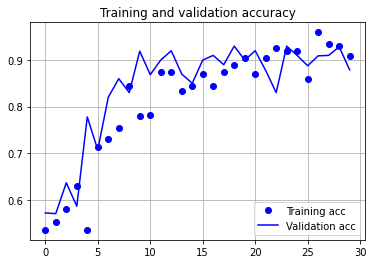

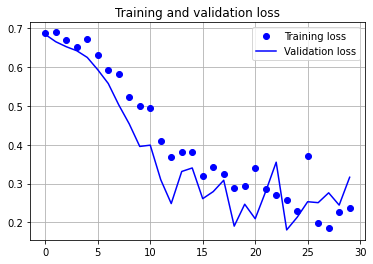

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(axis='both')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(axis='both')
plt.legend()

plt.show()

# Test on test set

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('sneezing_Inception_try.h5')


In [ ]:
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/test/{classname}/*.mp4'

# Create video frame generator
test = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    shuffle=False,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=True)

Total data: 2 classes for 92 files for train


In [ ]:
test_model.evaluate(test)

9/9 [==============================] - 45s 5s/step - loss: 0.1766 - accuracy: 0.9333


[0.17655713856220245, 0.9333333373069763]

# Scraping and parsing from YouTube query

In [ ]:
import requests
import json
from bs4 import BeautifulSoup

# keywords = ['python', 'youtube', 'scraper']
keywords = ['sneezing']
pages = 5

baseUrl = 'https://www.youtube.com'
headMatch = '{"responseContext"'
tailMatch = ';</script>'
outputFile = open('output.csv', 'w')
debugFile = open('debug.txt', 'w')
outputLines = []

for page in range(1, pages+1):
    response = requests.get(baseUrl+'/results?search_query='+'+'.join(keywords)+'&page='+str(page))
    soup = BeautifulSoup(response.text, 'html.parser')
    debugFile.write(soup.prettify())
    jsonStr = ''

    for script in soup.find_all('script'):
        scriptStr = str(script)
        headIndex = scriptStr.find(headMatch)
        if headIndex != -1:
            tailIndex = scriptStr.find(tailMatch)
            jsonStr = scriptStr[headIndex:tailIndex]
            break

    data = json.loads(jsonStr)
    contents = data['contents']['twoColumnSearchResultsRenderer']['primaryContents']['sectionListRenderer']['contents'][0]['itemSectionRenderer']['contents']
    for content in contents:
        if 'videoRenderer' in content:
            title = content['videoRenderer']['title']['runs'][0]['text'].replace(',', ' ')
            url = content['videoRenderer']['navigationEndpoint']['commandMetadata']['webCommandMetadata']['url']
            outputLines.append(title+','+baseUrl+url)

outputFile.write('title,url\n'+'\n'.join(outputLines))

10310

# Download youtube videos

Make directory for the youtube videos

In [ ]:
import os

# Directory for the YouTube videos
youtube_dir = '/content/youtube'
os.mkdir(youtube_dir)

Download YouTube videos from scraped information

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [ ]:
import youtube_dl, subprocess
import datetime
import numpy as np


'''
  YouTube videos
'''

links = ['https://www.youtube.com/watch?v=vPDVWMjg6SU',
         ]
for i, link in enumerate(links):
  for j in range(0,60,2): # The range is number of seconds to test
    URL = link # url of YouTube video
    FROM = str(datetime.timedelta(seconds=j))
    LENGTH = str(datetime.timedelta(seconds=2))
    TARGET = os.path.join(youtube_dir,"test.{}.mp4".format(np.int(j/2)))
    
    with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
      try:
        result = ydl.extract_info(URL, download=False)
        video = result['entries'][0] if 'entries' in result else result
      except:
        continue
      
    url = video['url']
    subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                    '-c:v', 'copy', '-c:a', 'copy', TARGET,]) 
  

[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage


# Test on YouTube videos and write to .json

Load saved model

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('sneezing_Inception_try.h5')

Function for predicting whether clip contains target action and write to file

In [ ]:
import numpy as np
import cv2
import json
from time import sleep
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


img_rows, img_cols, img_depth = 112, 112, 25

def load_video(path, max_frames=0, resize=(112, 112)):
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    while True:
      ret, frame = cap.read()
      if frame is not None:
        frame = cv2.resize(frame, resize)
        frame = frame[:, :, [2, 1, 0]]
        frames.append(frame)
        # plt.imshow(frame) 

      else:
        # print("Frame is None")
        break
      
      if len(frames) == max_frames:
        break
  finally:
    cap.release()
  return np.array(frames) / 255.0

videos = []

for i in range(30): # The number of clips downloaded to test
  try:
    frames = load_video('/content/youtube/test.{}.mp4'.format(i),max_frames=25)

    frames = np.expand_dims(frames,axis=0)

    p = test_model.predict(frames, batch_size = 1) # verbose = 1
    # print(p)
    prob = p[0][1]

    if prob > 0.6:
        temp = {
            'videoID': "vPDVWMjg6SU", # Change to video ID
            'type': "segment",
            'startTime': np.float(i*2),
            'endTime': np.float((i+1)*2),
            'observer': 'CSCE636Spring2021-astrajoan-8',
            'isHuman': 'false',
            'confirmedBySomeone': 'false',
            'rejectedBySomeone': 'false',
            'observation': {
                'label': 'Sneezing',
                'labelConfidence': np.float(prob),
            }
        }

        videos.append(temp)

  except:
    continue

with open('1.json', 'w', encoding='utf-8') as f:
  json.dump(videos, f, indent=4)


